In [1]:
%mkdir -p ../data/raw/emnist
%cd ../data/raw/emnist

!wget -c http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip
# !unzip -n matlab.zip

/Users/sergeyk/work/gradescope/full-stack-deep-learning/projects/text_recognizer/data/raw/emnist
URL transformed to HTTPS due to an HSTS policy
--2018-07-17 01:25:38--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 132.163.4.36
Connecting to www.itl.nist.gov (www.itl.nist.gov)|132.163.4.36|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
import zipfile
zip_file = zipfile.ZipFile('matlab.zip', 'r')
zip_file.extract('matlab/emnist-byclass.mat')

'/Users/sergeyk/work/gradescope/full-stack-deep-learning/projects/text_recognizer/data/raw/emnist/matlab/emnist-byclass.mat'

In [3]:
from scipy.io import loadmat
data = loadmat('matlab/emnist-byclass.mat')
data['dataset'].dtype

dtype([('train', 'O'), ('test', 'O'), ('mapping', 'O')])

In [4]:
x_train = data['dataset']['train'][0, 0]['images'][0, 0]
y_train = data['dataset']['train'][0, 0]['labels'][0, 0]
x_test = data['dataset']['test'][0, 0]['images'][0, 0]
y_test = data['dataset']['test'][0, 0]['labels'][0, 0]
mapping = {k: chr(v) for k, v in data['dataset']['mapping'][0, 0]}
%whos

Variable   Type        Data/Info
--------------------------------
data       dict        n=4
loadmat    function    <function loadmat at 0x113980f28>
mapping    dict        n=62
x_test     ndarray     116323x784: 91197232 elems, type `uint8`, 91197232 bytes (86.97245788574219 Mb)
x_train    ndarray     697932x784: 547178688 elems, type `uint8`, 547178688 bytes (521.8302612304688 Mb)
y_test     ndarray     116323x1: 116323 elems, type `uint8`, 116323 bytes (113.5966796875 kb)
y_train    ndarray     697932x1: 697932 elems, type `uint8`, 697932 bytes (681.57421875 kb)
zip_file   ZipFile     <zipfile.ZipFile filename='matlab.zip' mode='r'>
zipfile    module      <module 'zipfile' from '/<...>ib/python3.6/zipfile.py'>


In [5]:
print(x_train[0, :200], x_train.dtype)
print(y_train[0], y_train.dtype)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  22  81 125  77   0   0   0   0   0   0   1  19
   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 159 232
 249 206  10   0   0   0   0   0  34 201 207  90   1   0   0   0   0   0
   0   0   0   0   0   0  24 170 254 254 254 253 113   4   0   0   0   0
  84 233] uint8
[35] uint8


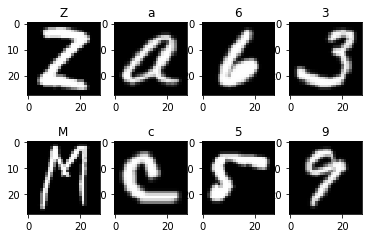

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

ind = 0
fig, axes = plt.subplots(2, 4)

for ind, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[ind].reshape(28, 28).T, cmap='gray')
    ax.set_title(mapping[y_train[ind, 0]])

In [7]:
import numpy as np
np.savez('emnist-byclass.npz', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, mapping=mapping)

In [11]:
%rm -r matlab
%rm matlab.zip

rm: matlab: No such file or directory
rm: matlab.zip: No such file or directory


In [ ]:
# The content of this notebook are going into text_recognizer/datasets/emnist.py

In [5]:
import numpy as np
data = np.load('../data/processed/emnist/byclass.npz')

In [10]:
data['mapping']

array({0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'},
      dtype=object)

In [4]:
import sys
sys.path.append('..')
from text_recognizer.datasets.emnist import EmnistDataset

dataset = EmnistDataset()

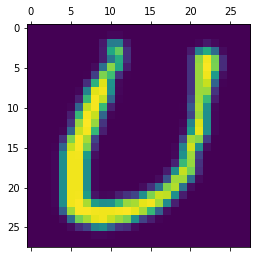

In [45]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x_test_r = dataset.x_test.reshape(-1, 28, 28).swapaxes(1, 2)
plt.matshow(x_test_r[5])